<a href="https://colab.research.google.com/github/E2811/Insulin-Calulator/blob/master/modeloCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import cv2 
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
X =[]
filenames = sorted(os.listdir('/content/drive/My Drive/united'))
for files in filenames:
  print(files)
  img = img = cv2.resize(cv2.cvtColor(cv2.imread(os.path.join('/content/drive/My Drive/united',files)), cv2.COLOR_BGR2RGB), (224, 224))
  X.append(img.astype(np.float32))
X = np.array(X)

Streaming output truncated to the last 5000 lines.
hamburger0_109.jpg
hamburger0_123.jpg
hamburger0_124.jpg
hamburger0_22.jpg
hamburger0_240.jpg
hamburger0_241.jpg
hamburger0_255.jpg
hamburger0_281.jpg
hamburger0_317.jpg
hamburger100057.jpg
hamburger100517.jpg
hamburger1007277.jpg
hamburger100930.jpg
hamburger1009426.jpg
hamburger1010136.jpg
hamburger1010140.jpg
hamburger1010695.jpg
hamburger1013830.jpg
hamburger1017874.jpg
hamburger102005.jpg
hamburger1028639.jpg
hamburger1029228.jpg
hamburger1031616.jpg
hamburger1035486.jpg
hamburger1036215.jpg
hamburger1036785.jpg
hamburger103716.jpg
hamburger1038553.jpg
hamburger1041547.jpg
hamburger1041748.jpg
hamburger1041751.jpg
hamburger1042117.jpg
hamburger1049005.jpg
hamburger1053407.jpg
hamburger1057407.jpg
hamburger1061270.jpg
hamburger1065477.jpg
hamburger1071442.jpg
hamburger107320.jpg
hamburger1084567.jpg
hamburger1084912.jpg
hamburger1086335.jpg
hamburger109961.jpg
hamburger1101890.jpg
hamburger1104146.jpg
hamburger1105370.jpg
hamburger

In [0]:
y=np.concatenate((np.zeros(1000),np.ones(1000), np.array([float(2)]*1000),np.array([float(3)]*1000),np.array([float(4)]*1000),np.array([float(5)]*1000),np.array([float(6)]*1000),np.array([float(7)]*1000)))
train_X, test_X, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_X = train_X/255.0
test_X = test_X/255.0

In [0]:
n_classes = 8
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=n_classes, dtype='float32')
y_test = keras.utils.to_categorical(y_test, num_classes=n_classes, dtype='float32')

In [5]:
model = Sequential()
chanDim = -1

if K.image_data_format() == "channels_first":
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same", input_shape=train_X.shape[1:]))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()

# CNN params

EPOCHS = 25
INIT_LR = 1e-3
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

#Training the model

model.compile(loss='categorical_crossentropy',
                optimizer=opt, metrics=['accuracy'])

model.fit(train_X, y_train,
        batch_size=BS,
        epochs=EPOCHS,
        verbose=1,
        validation_data=(test_X, y_test))

score = model.evaluate(test_X, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
import json
model_json = model.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_2.h5")













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 64)        1849

[6.9056814e-06 6.0415454e-04 8.4666157e-05 9.9929953e-01 8.4990961e-07
 4.4265917e-08 3.7212205e-06 6.0885320e-08]
3


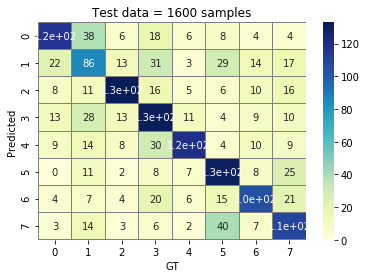

[6.9056814e-06 6.0415454e-04 8.4666157e-05 9.9929953e-01 8.4990961e-07
 4.4265917e-08 3.7212205e-06 6.0885320e-08]
3


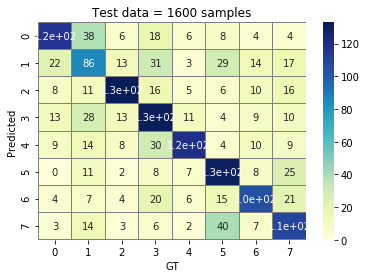

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Use argmax to project output probabilites as class index label
proba = model.predict(test_X)
print(proba[0])
y_pred = np.argmax(proba, axis=1)
print(y_pred[0])
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_pred)
sns.heatmap(cm, annot=True, linewidths=0.01, cmap="YlGnBu", linecolor="gray")

plt.xlabel("GT")
plt.ylabel("Predicted")
plt.title(f"Test data = {len(y_pred)} samples")
plt.show()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
